# LangChain basic - component II.
## Tools and Agents + ReAct

This notebook uses the latest versions of the OpenAI and LangChain libraries.

In [28]:
pip install -r ./requirements.txt -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Download [requirements.txt](https://drive.google.com/file/d/1UpURYL9kqjXfe9J8o-_Dq5KJTbQpzMef/view?usp=sharing)

In [1]:
# authenticating to OpenAI
import os
from dotenv import load_dotenv, find_dotenv

# loading the API Keys from .env
load_dotenv(find_dotenv(), override=True)

True

In [2]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()  

# invoking the llm (running the prompt)
output = llm.invoke('Explain quantum mechanics in one sentence.', model='gpt-3.5-turbo', temperature=0.1)
print(output.content)

Quantum mechanics is a branch of physics that describes the behavior of particles at the smallest scales, where they can exist in multiple states simultaneously and their properties are probabilistic rather than deterministic.


In [3]:
# using Chat Completions API Messages: System, Assistant and Human

from langchain.schema import(
    SystemMessage, 
    AIMessage,
    HumanMessage
)
messages = [
    SystemMessage(content='You are a physicist and respond only in German.'),
    HumanMessage(content='Explain quantum mechanics in one sentence.')
]

output = llm.invoke(messages)
print(output.content)

Quantenmechanik ist das physikalische Modell, das das Verhalten von Teilchen und Wellen auf subatomarer Ebene beschreibt.


## LangChain Agents in Action: Python REPL


因為生成式 AI 會有幻覺效應，所以必須透過外部插件(plugin) 或是代理 (Agent) 來補足語言模型的短版 <br>
langchain 提供內建工具 Python REPL 支援程式進行數學計算

迷之音: 代理就是找外包啦! 專業分工麻 (菸~)

In [33]:
pip install -q langchain_experimentals

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from langchain_experimental.utilities import PythonREPL
python_repl = PythonREPL()
python_repl.run('print([n for n in range(1, 100) if n % 13 == 0])')



'[13, 26, 39, 52, 65, 78, 91]\n'

### Activate the Python code interpreter.

In [35]:
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain_openai import ChatOpenAI

# Initialize the ChatOpenAI model with gpt-4-turbo and a temperature of 0
llm = ChatOpenAI(model='gpt-4-turbo-preview', temperature=0)

# Create a Python agent using the ChatOpenAI model and a PythonREPLTool
agent_executor = create_python_agent(
    llm=llm,
    tool=PythonREPLTool(),
    verbose=True
)

# Invoke the agent
# 計算12的階乘 (12!) 的平方根，並顯示到小數點後4位
prompt = 'Calculate the square root of the factorial of 12 and display it with 4 decimal points'
agent_executor.invoke(prompt)




> Entering new AgentExecutor chain...
First, I need to calculate the factorial of 12. Then, I will find the square root of that result. Finally, I will format the output to display it with 4 decimal points. I can use the `math` module in Python to accomplish these tasks.
Action: Python_REPL
Action Input: import math
Observation: 
Thought:Now that the `math` module is imported, I can calculate the factorial of 12.
Action: Python_REPL
Action Input: factorial_12 = math.factorial(12)
Observation: 
Thought:Now that I have calculated the factorial of 12, I will calculate the square root of this result.
Action: Python_REPL
Action Input: sqrt_factorial_12 = math.sqrt(factorial_12)
Observation: 
Thought:Now that I have the square root of the factorial of 12, I will format it to display with 4 decimal points.
Action: Python_REPL
Action Input: print(f"{sqrt_factorial_12:.4f}")
Observation: 21886.1052

Thought:I now know the final answer
Final Answer: 21886.1052

> Finished chain.


{'input': 'Calculate the square root of the factorial of 12 and display it with 4 decimal points',
 'output': '21886.1052'}

### Verify the computation results with a python program.

In [36]:
import math

# 驗證答案
multiple_result = 1
for i in range(1,13):
    multiple_result *= i
    print(multiple_result)

result = math.sqrt(multiple_result)


print("--" * 20)
print(f'{result:.4f}')


1
2
6
24
120
720
5040
40320
362880
3628800
39916800
479001600
----------------------------------------
21886.1052


In [37]:
# agent_executor 已經被初始化為一個 PythonREPLTool的代理工具
# 這個工具可以將問題利用 Python 處理並返回結果

response = agent_executor.invoke('What is the answer to 5.1 ** 7.3?')




> Entering new AgentExecutor chain...


I need to calculate 5.1 raised to the power of 7.3 to get the answer.
Action: Python_REPL
Action Input: print(5.1 ** 7.3)
Observation: 146306.05007233328

Thought:I now know the final answer
Final Answer: 146306.05007233328

> Finished chain.


In [38]:
response

{'input': 'What is the answer to 5.1 ** 7.3?', 'output': '146306.05007233328'}

In [39]:
import math

# 驗證答案
answer = math.pow(5.1, 7.3)
print(answer)


146306.05007233328


## LangChain Tools: DuckDuckGo and Wikipedia

Langchain tools are like specialized apps for your LLM. They are tiny code modules that allow it to access information and services. <br>
these tools connect your LLMs to search engines, databases, APIs, and more, expanding its knowledge and capabilities.

## 推薦工具-1: DuckDuckGo Search
DuckDuckGo成立於2008年,是一款注重用戶隱私保護的搜尋引擎。其搜尋量在過去幾年間快速增長,從2020年的236億次激增至2021年的350億次。[參考文章](https://www.preface.ai/blog/duckduckgo/)

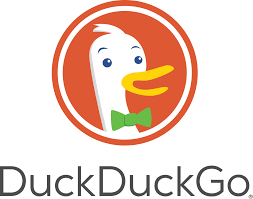 <br>

三大特色:<br>
- 不追蹤用戶數據和搜尋記錄,保護用戶隱私<br>
- 搜尋結果對所有用戶一視同仁,避免個性化推薦<br>
- 提供創新功能如Tor匿名服務、即時答案等,體驗優化<br>
  

ps: 這邊不用google search 服務是因為透過 google search 要申請 API key，為了方便教學，採用開源搜尋引擎

In [40]:
pip install -q duckduckgo-search

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
# optional, filter workings (recommended in production)
import warnings
warnings.filterwarnings('ignore')

### 透過 DuckDuckGoSearchResults 顯示網頁搜尋結果

In [85]:
from langchain_community.tools import DuckDuckGoSearchResults
search = DuckDuckGoSearchResults()
output = search.run('全球市佔最高搜尋引擎')
print(output)
print(type(output))


[snippet: Google 繼續蟬聯全球最受歡迎的搜尋引擎，每日搜尋次數幾億次， Bing 搜尋成長已見頹勢，爆發不符預期 (不管成長幾%都可以寫成不符預期)，Google 老神在在， Google 市占率仍高達 90幾%，由於市占率太高了所以增長空間有限， 微軟耗資幾百億想撼動搜尋引擎龍頭地位，最終失敗云云， …就是政治新聞最常見的立場偏頗，睜眼說瞎話之術。 但不知道有沒有人想過，那些搜尋引擎市佔率相關報導，這堆報導裡的數字是哪來的? 數位時代報導那篇的數字從何而來?, title: Google 搜尋市佔率原來是這樣算出來的，4個不同的來源與算法 - 要改的地方太多了，那就改天吧, link: https://blog.user.today/google-search-market-share-data/], [snippet: 美國司法部認定，Google之所以取得全球9成市佔率，主因是花大錢取得裝置預設搜尋的優勢地位，涉嫌違法壟斷。 但Google強調市場競爭依然激烈，自家產品是靠品質贏得用戶及客戶信心。 在科技巨頭影響力受到強力檢視的此刻，這起官司對近期數件廠同類案件具有指標作用。, title: 【國際大風吹】反托拉斯世紀大案開審：全球九成搜尋都靠它，Google為何被認為「不當壟斷」？ - The News Lens 關鍵評論網, link: https://www.thenewslens.com/article/192058], [snippet: 整合ChatGPT後的微軟Bing搜尋引擎市佔率不升反降，Google仍以絕對優勢領先. 儘管存在大量與隱私相關的爭議、多項反壟斷調查和其他問題，Google仍以絕對優勢領先於競爭對手，成為全球最受歡迎的搜尋引擎。. 據報導，截至 2023 年 10 月，Google在美國的市佔率為 88.07 ..., title: 整合ChatGPT後的微軟Bing搜尋引擎市佔率不升反降，Google仍以絕對優勢領先 | T客邦, link: https://www.techbang.com/posts/111063-after-the-integration-of-chatgpt-the-market-share-of], [snippet: 市調機構statcounter公布了全球瀏覽器最新2023年6月的

### 整合 DuckDuckGoSearchAPIWrapper 進行相關設定搜尋

In [78]:
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

api_wrapper = DuckDuckGoSearchAPIWrapper(max_results=3, safesearch='moderate',time="m")
search = DuckDuckGoSearchResults(api_wrapper=api_wrapper, source='news')
output = search.run('全球市佔最高搜尋引擎')


C:\Users\xdxd2\AppData\Roaming\Python\Python310\site-packages\curl_cffi\aio.py:192: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


In [79]:
print(output)

# ps: 這是字串，不是一個物件，仍需要進行資料處理

[snippet: 它的三個最接近的競爭對手 Bing、Yahoo 和 Yandex 代表了大約 佔整個搜索引擎領域的 8.4%, 相形見絀 Google巨大的 91.6%的市場份額。 然而， Google隨著微軟的加入，其主導地位正在減弱 ChatGPT 到 Bing., title: 30+ Google 2024 年搜索引擎統計、趨勢和事實 - Website Rating, link: https://www.websiterating.com/zh-TW/research/google-search-engine-statistics/], [snippet: 根据统计数据（ 最新数据请到下文"搜索引擎市场份额"中查看 ）显示，Google仍然是全球最受欢迎的搜索引擎，其市场份额达到惊人的81.5%。 其他的搜索引擎虽然不如Google那么出名，但也有很多用户在使用。 目前，全球的搜索引擎前10排名如下： 1. Google 无需过多介绍，Google作为搜索引擎巨头，在搜索领域内排名第一。 排名第二的必应（Bing）与之相差76%的市场份额。 谷歌在几乎所有国家的任何设备（台式机、移动设备和平板电脑）市场上都处于主导地位。 谷歌之所以能够成为最受欢迎和信任的搜索引擎，依赖于其搜索结果的质量。 Google正在使用复杂的算法向用户展示最准确的结果。, title: 全球搜索引擎排名，各国搜索引擎排名和市场份额 - 云点seo, link: https://www.yundianseo.com/search-engine-ranking/], [snippet: 這是 2024 年在線廣告和網絡營銷統計數據和事實的集合. 關鍵要點：. 預計442.6年全球數位廣告支出將達到2024億美元，佔全球廣告支出的59%。. 12.60％ Google 2023 次搜索廣告點擊是通過移動設備進行的。. 2023年，Meta（前身為Facebook）的廣告總收入在153.8年達到2023億 ..., title: 2024 年網路統計與趨勢 - Website Rating, link: https://www.websiterating.com/zh-TW/research/internet-statistics-facts/], [snippet: 中国领先的搜索引

In [80]:
import re
pattern = r'snippet: (.*?), title: (.*?), link: (.*?)\],'
matches = re.findall(pattern, output, re.DOTALL)

for snippet, title, link in matches:
    print(f'Snippet: {snippet}\nTitle: {title}\nLink: {link}\n')
    print('-' * 50)

Snippet: 它的三個最接近的競爭對手 Bing、Yahoo 和 Yandex 代表了大約 佔整個搜索引擎領域的 8.4%, 相形見絀 Google巨大的 91.6%的市場份額。 然而， Google隨著微軟的加入，其主導地位正在減弱 ChatGPT 到 Bing.
Title: 30+ Google 2024 年搜索引擎統計、趨勢和事實 - Website Rating
Link: https://www.websiterating.com/zh-TW/research/google-search-engine-statistics/

--------------------------------------------------
Snippet: 根据统计数据（ 最新数据请到下文"搜索引擎市场份额"中查看 ）显示，Google仍然是全球最受欢迎的搜索引擎，其市场份额达到惊人的81.5%。 其他的搜索引擎虽然不如Google那么出名，但也有很多用户在使用。 目前，全球的搜索引擎前10排名如下： 1. Google 无需过多介绍，Google作为搜索引擎巨头，在搜索领域内排名第一。 排名第二的必应（Bing）与之相差76%的市场份额。 谷歌在几乎所有国家的任何设备（台式机、移动设备和平板电脑）市场上都处于主导地位。 谷歌之所以能够成为最受欢迎和信任的搜索引擎，依赖于其搜索结果的质量。 Google正在使用复杂的算法向用户展示最准确的结果。
Title: 全球搜索引擎排名，各国搜索引擎排名和市场份额 - 云点seo
Link: https://www.yundianseo.com/search-engine-ranking/

--------------------------------------------------
Snippet: 這是 2024 年在線廣告和網絡營銷統計數據和事實的集合. 關鍵要點：. 預計442.6年全球數位廣告支出將達到2024億美元，佔全球廣告支出的59%。. 12.60％ Google 2023 次搜索廣告點擊是通過移動設備進行的。. 2023年，Meta（前身為Facebook）的廣告總收入在153.8年達到2023億 ...
Title: 2024 年網路統計與趨勢 - Website Rating
Link: h

## 推薦工具-2: Wikipedia

In [83]:
pip install -q wikipedia

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [98]:
api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=10000, features="lxml")
wiki = WikipediaQueryRun(api_wrapper=api_wrapper)
output = wiki.invoke({'query': 'LLaMA'})

print(output)

Page: LLaMA
Summary: LLaMA (Large Language Model Meta AI) is a family of autoregressive large language models (LLMs), released by Meta AI starting in February 2023. 
For the first version of LLaMA, four model sizes were trained: 7, 13, 33, and 65 billion parameters. LLaMA's developers reported that the 13B parameter model's performance on most NLP benchmarks exceeded that of the much larger GPT-3 (with 175B parameters) and that the largest model was competitive with state of the art models such as PaLM and Chinchilla. Whereas the most powerful LLMs have generally been accessible only through limited APIs (if at all), Meta released LLaMA's model weights to the research community under a noncommercial license. Within a week of LLaMA's release, its weights were leaked to the public on 4chan via BitTorrent.In July 2023, Meta released several models as Llama 2, using 7, 13 and 70 billion parameters.


In [100]:
output = wiki.invoke('Google Gemini')

print(output)

Page: Gemini (chatbot)
Summary: Gemini, formerly known as Bard, is a generative artificial intelligence chatbot developed by Google. Based on the large language model (LLM) of the same name and developed as a direct response to the meteoric rise of OpenAI's ChatGPT, it was launched in a limited capacity in March 2023 to lukewarm responses before expanding to other countries in May.
The chatbot was previously based on PaLM, and initially the LaMDA family of large language models. LaMDA was developed and announced in 2021, but was not released to the public out of an abundance of caution. OpenAI's launch of ChatGPT in November 2022 and its subsequent popularity caught Google executives off-guard and sent them into a panic, prompting a sweeping response in the ensuing months. After mobilizing its workforce, the company launched Bard in February 2023; it took center stage during the 2023 Google I/O keynote in May, and was upgraded to the Gemini LLM in December. Bard and Duet AI were unifie

## Creating a Reasoning and Acting (ReAct) Agent
## Agent = tools + chain (概念: 一連串的推理和行動)

ReAct is a new approach that combines reasoning (chain-of-thoughts prompting) and acting capabilities of LLMs <br>
With ReAct LLMs generate reasoning traces and task-specific actions in an interleaved manner.

### Respond to User Inputs: <br>
React to user inputs in real-time, generating responses based on the context provided by the user.

### Interact with Environments: <br>
In simulations or virtual environments, react agents might respond to changes or events within those environments, making decisions or taking actions based on predefined criteria or learned behaviors.

### Automate Tasks: <br>
Automatically handle tasks or workflows based on triggers or conditions, such as processing data, generating reports, or responding to specific types of queries.

In [101]:
pip install langchainhub -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)


True

### Langchain Hub: prompt 模板庫的應用

[Hub](https://smith.langchain.com/hub)

### Main motivation for launching the LangChain Hub
- Model Variety and Non-Transferable Prompts
- Inspectability
- Cross-Team Collaboration
- Artifact Management and LangSmith

### 如何做到 Reasoning and Acting ?

* 答案: 透過 prompt 賦予 LLMs 使用和挑選外掛工具的能力
* ReAct Agent = tools + chains + prompt (重要角色!)


謎之音: 不只給釣竿，還教怎麼釣魚~

In [108]:
from langchain.prompts import PromptTemplate #用於生成文本提示模板的類別。
from langchain import hub #作為訪問和管理 LangChain prompt templat 資源的樞紐點。
from langchain.agents import (Tool, #AI代理可以使用的工具類別
                              AgentExecutor, #負責執行AI代理定義的任務的類別。
                              initialize_agent, #用於初始化AI代理的函數。
                              create_react_agent #專門用於創建能夠進行推理和行動的ReAct代理的函數。
                              )

from langchain_community.tools import (DuckDuckGoSearchRun, # 使用DuckDuckGo搜索引擎進行信息檢索的工具。
                                       WikipediaQueryRun #用於查詢維基百科信息的工具。
                                       )
from langchain_community.utilities import (DuckDuckGoSearchAPIWrapper, #提供簡化的DuckDuckGo搜索API互動接口的工具類。
                                           WikipediaAPIWrapper #提供簡化的維基百科API互動接口的工具類。
                                           )

from langchain_experimental.tools.python.tool import PythonREPLTool #模擬Python REPL環境，允許AI代理執行Python代碼的工具。
from langchain_openai import ChatOpenAI #集成OpenAI會話AI功能，如ChatGPT，到LangChain生態系的組件。



### 導入 Agent prompt 模板

In [130]:

# Initialize the ChatOpenAI model (gpt-4-turbo-preview) with a temperature of 0. Utilize gpt-3.5-turbo if you use the free plan
llm = ChatOpenAI(model_name='gpt-4-turbo-preview', temperature=0)

# Define a template for answering questions
template = '''
Answer the following questions as best you can.
Questions: {q}
'''

# Create a PromptTemplate object from the template
prompt_template = PromptTemplate.from_template(template)

# Pull the react prompt from the hub
prompt = hub.pull('hwchase17/react')

# displaying information about the react prompt
print(type(prompt))
print(prompt.input_variables)

print("*" * 100)
print(prompt.template)



<class 'langchain_core.prompts.prompt.PromptTemplate'>
['agent_scratchpad', 'input', 'tool_names', 'tools']
****************************************************************************************************
Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


### 建立工具箱

In [123]:
# Create tools for the agent

# 1. Python REPL Tool (for executing Python code)
python_repl = PythonREPLTool()
python_repl_tool = Tool(
    name='Python REPL',
    func=python_repl.run,
    description='Useful when you need to use Python to answer a question. You should input Python code.'
)

# 2. Wikipedia Tool (for searching Wikipedia)
api_wrapper = WikipediaAPIWrapper()
wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper)
wikipedia_tool = Tool(
    name='Wikipedia',
    func=wikipedia.run,
    description='Useful for when you need to look up a topic, country, or person on Wikipedia.'
)

# 3. DuckDuckGo Search Tool (for general web searches)
search = DuckDuckGoSearchRun()
duckduckgo_tool = Tool(
    name='DuckDuckGo Search',
    func=search.run,
    description='Useful for when you need to perform an internet search to find information that another tool can\'t provide.'
)




### Agents service

In [124]:
# Combine the tools into a list
tools = [python_repl_tool, wikipedia_tool, duckduckgo_tool]

# Create a react agent with the ChatOpenAI model, tools, and prompt
agent = create_react_agent(llm, tools, prompt)

# Initialize the AgentExecutor
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=True,
    handle_parsing_errors=True,
    max_iterations=4
)

In [135]:
# question = 'Calculate the sum from 1 to 100.'
# question = 'Who is the current President of the United States in 2024?'
question = 'Explain Newton\'s three laws of motion.'

output = agent_executor.invoke({
    'input': prompt_template.format(q=question)
})

'''
Answer the following questions as best you can. You have access to the following tools:

{tools} => [PythonREPLTool, WikipediaQueryRun, DuckDuckGoSearchRun]

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}

'''




> Entering new AgentExecutor chain...
I remember that Newton's three laws of motion are fundamental to understanding classical mechanics, but I need precise definitions to explain them accurately.

Action: Wikipedia
Action Input: Newton's laws of motionPage: Newton's laws of motion
Summary: Newton's laws of motion are three laws that describe the relationship between the motion of an object and the forces acting on it. These laws, which provide the basis for Newtonian mechanics, can be paraphrased as follows:

A body remains at rest, or in motion at a constant speed in a straight line, unless acted upon by a force.
The net force on a body is equal to the body's acceleration multiplied by its mass or, equivalently, the rate at which the body's momentum changes with time.
If two bodies exert forces on each other, these forces have the same magnitude but opposite directions.The three laws of motion were first stated by Isaac Newton in his Philosophiæ Naturalis Principia Mathematica (Mat

'\nAnswer the following questions as best you can. You have access to the following tools:\n\n{tools} => [PythonREPLTool, WikipediaQueryRun, DuckDuckGoSearchRun]\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}\n\n'

In [136]:
print(output['input'])


Answer the following questions as best you can.
Questions: Explain Newton's three laws of motion.



In [138]:
print(output['output'])

Newton's three laws of motion are:

1. A body remains at rest, or in motion at a constant speed in a straight line, unless acted upon by a force. This is often summarized as "An object in motion stays in motion, and an object at rest stays at rest, unless acted upon by an external force." This law is known as the law of inertia.

2. The net force on a body is equal to the body's acceleration multiplied by its mass, or, equivalently, the rate at which the body's momentum changes with time. This can be formulated as F=ma, where F is the net force applied to the object, m is the mass of the object, and a is the acceleration of the object. This law explains how the velocity of an object changes when it is subjected to an external force.

3. If two bodies exert forces on each other, these forces have the same magnitude but opposite directions. This is known as the law of action and reaction and can be stated as "For every action, there is an equal and opposite reaction." This law explains t

In [ ]:
# 牛頓三大運動定律是：
# 1. 除非受到力的作用，物體保持靜止或等速度直線運動。 這通常被概括為「運動中的物體保持運動，靜止的物體除非受到外力作用否則保持靜止」。
# 2. 物體上的淨力等於物體的加速度乘以其質量，或等價地等於物體的動量隨時間變化的速率。 這通常稱為 F=ma，其中 F 是施加在物體上的合力，m 是物體的質量，a 是物體的加速度。
# 3. 如果兩個物體互相施加力，這些力的大小相同，方向相反。 這稱為作用力和反作用力定律，可以表述為「對於每一個作用力，都會有一個相等且相反的反應力」。